In [65]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [66]:
#Read the data
df=pd.read_csv('Clean_test.csv')

#Get shape and head
df.shape
df.head()

,Unnamed: 0,id,title,author,text,Reliability
0,0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
1,1,20801,Russian warships ready to strike terrorists ne...,Not available,Russian warships ready to strike terrorists ne...,1
2,2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0
3,3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",1
4,4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1


In [67]:
labels = df.Reliability
labels.head(4)

0    0
1    1
2    0
3    1
Name: Reliability, dtype: int64

In [68]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'],labels,test_size=0.2, random_state=7)

In [69]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [70]:
#Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=100)
pac.fit(tfidf_train,y_train)

#Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 83.85%


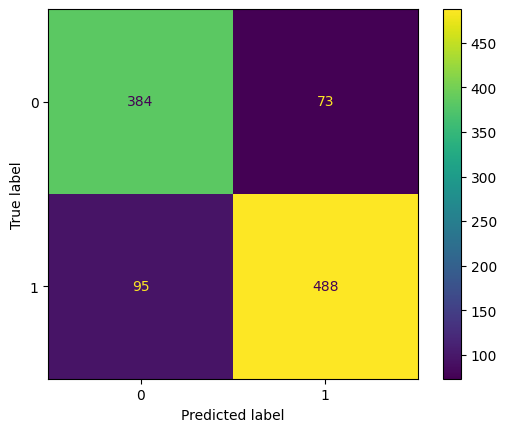

In [71]:
#DataFlair - Build confusion matrix
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()